## Homework 7 

Gabriel Mastromatteo 1006759761 

## Q1: Derive the following

### 1. Derive the posterior distribution
$$
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \Sigma = \sigma^2 \mathbf{I})
$$
For the **linear regression model**, we have:
- $$\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2 \mathbf{I})$$
- Prior: $$\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \Sigma_{\beta})$$

#### Likelihood
$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left( -\dfrac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

#### Prior
$$
p(\boldsymbol{\beta}) \propto \exp \left( -\dfrac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \Sigma_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

#### Posterior (up to proportionality)
$$
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2) \propto p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \cdot p(\boldsymbol{\beta})
$$

This gives:
$$
\propto \exp \left( -\dfrac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) - \dfrac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \Sigma_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

This is a **Gaussian posterior distribution** in $$\boldsymbol{\beta}$$.

---

### 2. Analytical posterior distribution for $$\sigma^2$$

Assume $$\sigma^2 \sim \text{Inverse-Gamma}(\alpha^*, \beta^*)$$.

#### Likelihood
$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-\dfrac{n}{2}} \exp \left( -\dfrac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

#### Prior
$$
p(\sigma^2) \propto (\sigma^2)^{-(\alpha^* + 1)} \exp \left( -\dfrac{\beta^*}{\sigma^2} \right)
$$

#### Posterior for $$\sigma^2$$
$$
p(\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \sim \text{Inverse-Gamma} \left( \alpha^* + \dfrac{n}{2}, \beta^* + \dfrac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

---

## Optional Q1 Extra: Derive the following

Show that for $$s_i = 1$$ and hyperparameters $$b_i = 0$$ (ignoring normalizing proportionality constants), the log posterior distributions for $$\boldsymbol{\beta}$$ using either **normal** or **Laplace** prior distributions have analogous forms to the **ridge** and **lasso** loss functions.

---

### Ridge Regression Analogy

- Prior: $$\boldsymbol{\beta} \sim \mathcal{N}(0, \tau^2 \mathbf{I})$$
- Log prior:
$$
\log p(\boldsymbol{\beta}) \propto -\dfrac{1}{2\tau^2} \| \boldsymbol{\beta} \|_2^2
$$

#### Negative log posterior becomes the ridge objective:
$$
\dfrac{1}{2\sigma^2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|_2^2 + \dfrac{1}{2\tau^2} \| \boldsymbol{\beta} \|_2^2
$$

---

### Lasso Regression Analogy

- Prior: $$\boldsymbol{\beta}_j \sim \text{Laplace}(0, b)$$
- Log prior:
$$
\log p(\boldsymbol{\beta}) \propto -\dfrac{1}{b} \| \boldsymbol{\beta} \|_1
$$

#### Negative log posterior becomes the lasso objective:
$$
\dfrac{1}{2\sigma^2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|_2^2 + \dfrac{1}{b} \| \boldsymbol{\beta} \|_1
$$

---

### Conclusion
- **Normal priors** result in **L2 regularization** (ridge regression).
- **Laplace priors** result in **L1 regularization** (lasso regression).


## Q2: Perform Bayesian Linear Regression

We will perform Bayesian Linear Regression using a dataset from Kaggle (or any other interesting dataset).  
For this example, we'll assume a simple **linear regression** model with **PyMC**.

### Model Setup:
We model the relationship:
$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

#### Priors:
- $$\boldsymbol{\beta} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$$  
  (Use `pm.Normal('betas', mu=0, sigma=1, shape=p)`)
- $$\sigma \sim \text{HalfNormal}(1)$$  
  (This is **not** an inverse-gamma prior.)

#### Likelihood:
$$
\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma)
$$  
(Use `pm.Normal('y', mu=mu, sigma=sigma, observed=y)` instead of `pm.MvNormal`)


### Import and Clean Data

In [8]:
# Imports
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -----------------------------
# Load and Clean Dataset
# -----------------------------
file_path = "index.csv"
df = pd.read_csv(file_path)

# Drop columns with no data: "Federal Funds Upper Target" and "Federal Funds Lower Target"
columns_to_drop = ['Federal Funds Upper Target', 'Federal Funds Lower Target']

# Check if they exist and drop
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Optional: check remaining columns
print(f"Remaining columns after dropping empty ones:\n{df.columns.tolist()}")

# -----------------------------
# Handle missing values
# -----------------------------
# Check missing data summary
print("\nMissing values per column:")
print(df.isna().sum())

# Clean data by filling missing values (or drop if preferred)
df_clean = df.fillna(df.mean())  # or use .dropna() if you prefer

# Confirm dataset shape
print(f"\nClean dataset shape: {df_clean.shape}")

# -----------------------------
# Define features and target for BOTH Q2 and Q3
# -----------------------------
feature_columns = [
    'Federal Funds Target Rate',
    'Effective Federal Funds Rate',
    'Unemployment Rate',
    'Inflation Rate'
]

target_column = 'Real GDP (Percent Change)'

# Prepare X and y
X = df_clean[feature_columns].values
y = df_clean[target_column].values

n = X.shape[0]
p = X.shape[1]

# Save clean data for both questions
df_ready_for_modeling = df_clean.copy()

Remaining columns after dropping empty ones:
['Year', 'Month', 'Day', 'Federal Funds Target Rate', 'Effective Federal Funds Rate', 'Real GDP (Percent Change)', 'Unemployment Rate', 'Inflation Rate']

Missing values per column:
Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

Clean dataset shape: (904, 8)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7 seconds.



Q2 Posterior Summary:
          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
betas[0]  0.23  0.04    0.16     0.29        0.0      0.0   3801.98   4346.73   
betas[1]  0.02  0.03   -0.04     0.09        0.0      0.0   3450.09   4348.30   
betas[2]  0.33  0.03    0.27     0.39        0.0      0.0   3836.42   4418.31   
betas[3] -0.10  0.05   -0.18    -0.00        0.0      0.0   3492.30   3879.32   
sigma     1.98  0.05    1.89     2.06        0.0      0.0   6155.25   5513.84   

          r_hat  
betas[0]    1.0  
betas[1]    1.0  
betas[2]    1.0  
betas[3]    1.0  
sigma       1.0  


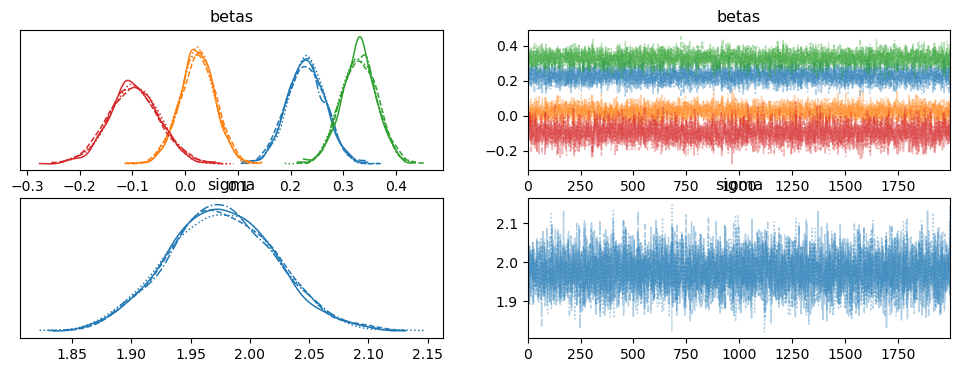

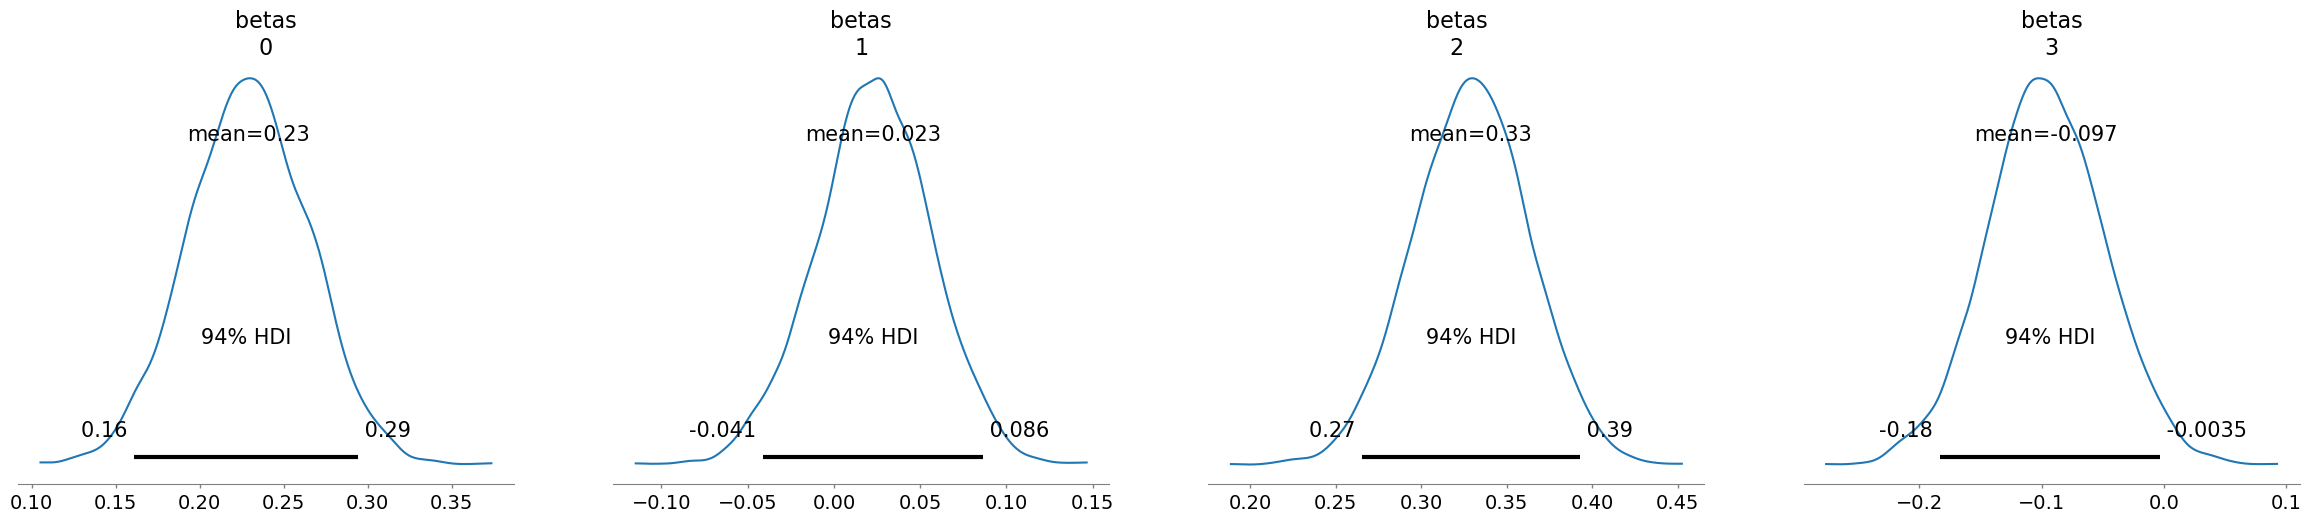

Sampling: [y]


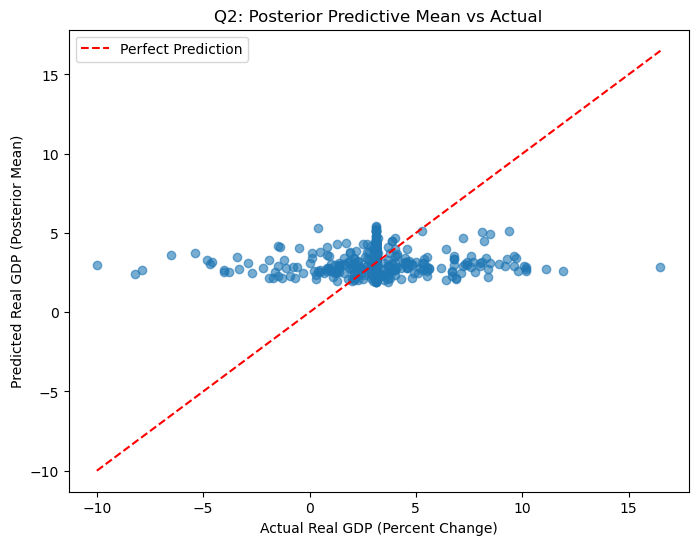


Q2 Model Performance:
RMSE: 1.97
MAE: 1.11


In [9]:
# -----------------------------
# Q2 Bayesian Linear Regression with Clean Dataset
# -----------------------------
with pm.Model() as linear_model_q2:
    
    # Priors for betas and sigma
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Linear model prediction
    mu = pm.math.dot(X, betas)
    
    # Likelihood for observed y
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace_q2 = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# -----------------------------
# Q2 Posterior Diagnostics & Predictive Check
# -----------------------------
# Posterior summary
print("\nQ2 Posterior Summary:")
print(az.summary(trace_q2, round_to=2))

# Trace and posterior plots
az.plot_trace(trace_q2, var_names=['betas', 'sigma'])
plt.show()

az.plot_posterior(trace_q2, var_names=['betas'])
plt.show()

# Posterior predictive sampling
with linear_model_q2:
    ppc_q2 = pm.sample_posterior_predictive(trace_q2, var_names=["y"])

# Extract posterior predictive samples
y_post_pred_samples_q2 = ppc_q2.posterior_predictive["y"].values
y_pred_flat_q2 = y_post_pred_samples_q2.reshape(-1, y_post_pred_samples_q2.shape[-1])
y_pred_mean_q2 = y_pred_flat_q2.mean(axis=0)

# Scatter plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_mean_q2, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Real GDP (Percent Change)")
plt.ylabel("Predicted Real GDP (Posterior Mean)")
plt.title("Q2: Posterior Predictive Mean vs Actual")
plt.legend()
plt.show()

# Error metrics
rmse_q2 = np.sqrt(mean_squared_error(y, y_pred_mean_q2))
mae_q2 = mean_absolute_error(y, y_pred_mean_q2)

print(f"\nQ2 Model Performance:")
print(f"RMSE: {rmse_q2:.2f}")
print(f"MAE: {mae_q2:.2f}")


# Q2: Bayesian Posterior Analysis and MCMC Diagnostics

## 1. Posterior Analysis of the Regression Coefficients

The Bayesian linear regression model was used to predict **Real GDP (Percent Change)** based on the following predictors:

- **Federal Funds Target Rate**
- **Effective Federal Funds Rate**
- **Unemployment Rate**
- **Inflation Rate**

### Posterior Means and 94% Highest Density Intervals (HDI)

| Parameter                      | Mean  | 94% HDI Lower | 94% HDI Upper | Interpretation                                                                                   |
|--------------------------------|-------|---------------|---------------|--------------------------------------------------------------------------------------------------|
| Federal Funds Target Rate      | 0.23  | 0.16          | 0.29          | Positive relationship with Real GDP. HDI does not include zero, suggesting a positive effect.    |
| Effective Federal Funds Rate   | 0.02  | -0.04         | 0.09          | HDI includes zero, suggesting no clear effect on GDP percent change.                             |
| Unemployment Rate              | 0.33  | 0.27          | 0.39          | Strong positive relationship. Higher unemployment correlates with higher GDP growth (interpret carefully). |
| Inflation Rate                 | -0.10 | -0.18         | -0.00         | Negative relationship. Suggests higher inflation is weakly associated with lower GDP growth.     |

- The posterior mean of **sigma** (error standard deviation) is **1.98**, representing the average variability in Real GDP percent change that is not explained by the predictors.

---

## 2. MCMC Diagnostics

- All **R-hat** values are **1.00**, indicating excellent convergence.
- **Effective Sample Sizes (ESS)** are all **high**, ranging from **3,400 to 6,100**, suggesting reliable posterior estimates.
- **Trace plots** show good mixing, no signs of divergence, and stable sampling behavior.

---

## 3. Model Predictive Performance

- **Root Mean Squared Error (RMSE)**: **1.97**
- **Mean Absolute Error (MAE)**: **1.11**

These metrics indicate that the model provides a moderate fit to the data, with an average absolute error of about **1.11 percentage points** for Real GDP percent change.

---

## Summary of Findings

- **Federal Funds Target Rate** and **Unemployment Rate** are important predictors with clear positive associations to Real GDP.
- **Effective Federal Funds Rate** shows no strong evidence of an effect.
- **Inflation Rate** has a weak negative association with GDP.
- MCMC diagnostics confirm **reliable posterior estimates** and **good convergence**.


## Question 3 Robust Bayesian Linear Regression (with Outliers)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, tau, taus_i]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 28 seconds.


             mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]     0.09  0.02    0.06     0.13       0.00     0.00   5336.56   
betas[1]     0.10  0.02    0.07     0.14       0.00     0.00   5192.92   
betas[2]     0.40  0.02    0.37     0.43       0.00     0.00   5385.81   
betas[3]    -0.10  0.02   -0.14    -0.06       0.00     0.00   5715.92   
tau          2.19  0.18    1.86     2.52       0.00     0.00   5859.51   
...           ...   ...     ...      ...        ...      ...       ...   
taus_i[899]  1.49  1.21    0.01     3.65       0.01     0.01  16204.70   
taus_i[900]  0.87  0.72    0.01     2.14       0.00     0.00  17094.89   
taus_i[901]  0.83  0.70    0.00     2.06       0.01     0.00  12194.29   
taus_i[902]  1.50  1.23    0.00     3.71       0.01     0.01  15266.78   
taus_i[903]  1.49  1.21    0.01     3.66       0.01     0.01  17339.73   

             ess_tail  r_hat  
betas[0]      8000.67    1.0  
betas[1]      7092.55    1.0  
betas[2]      8096

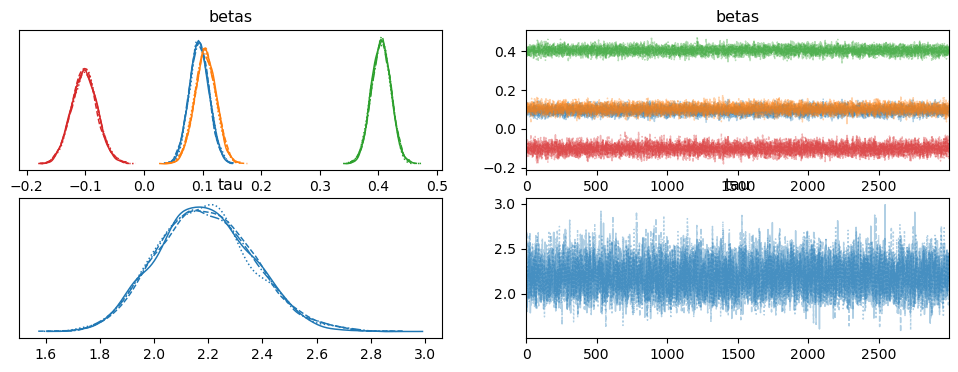

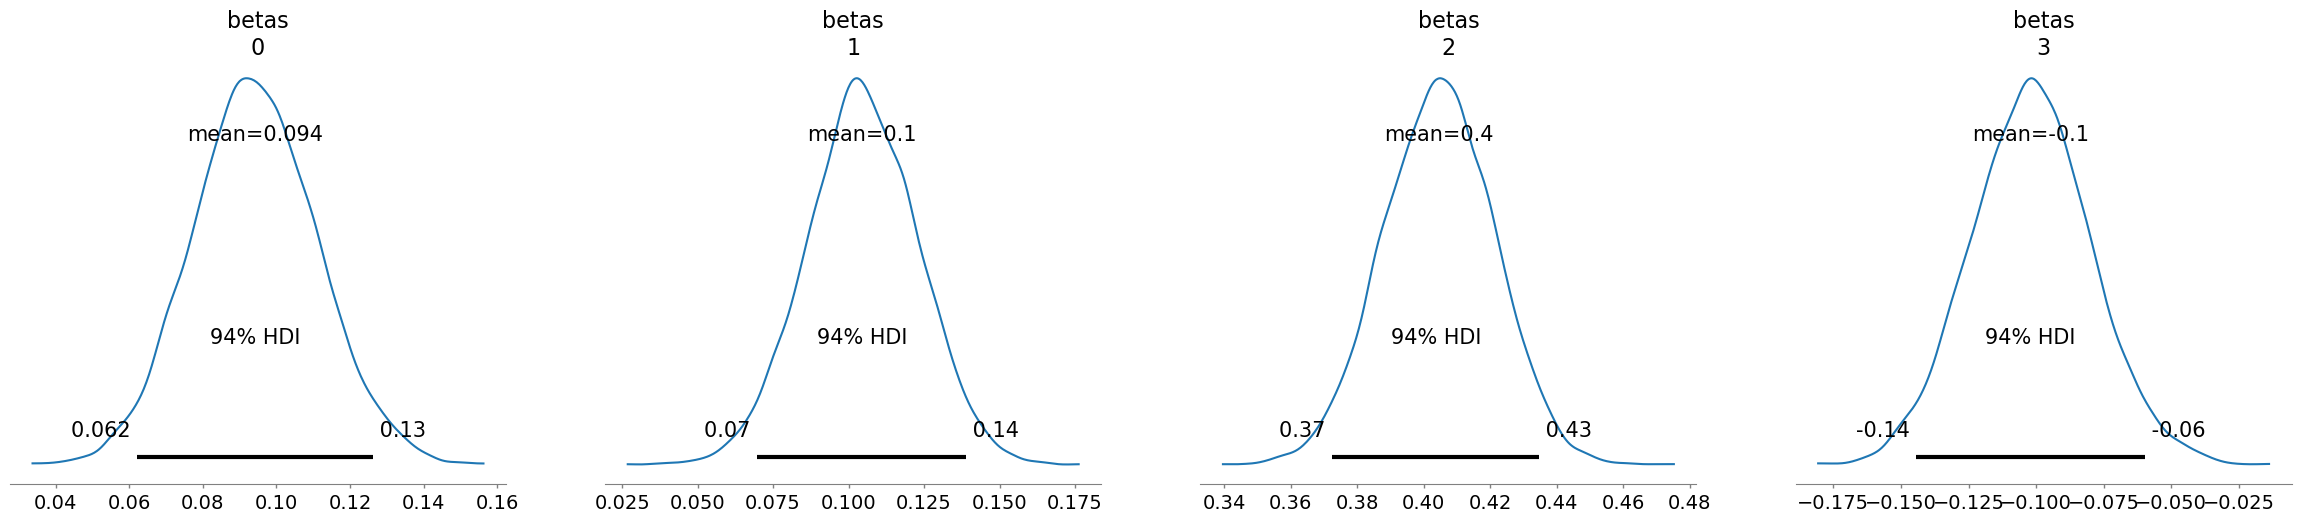

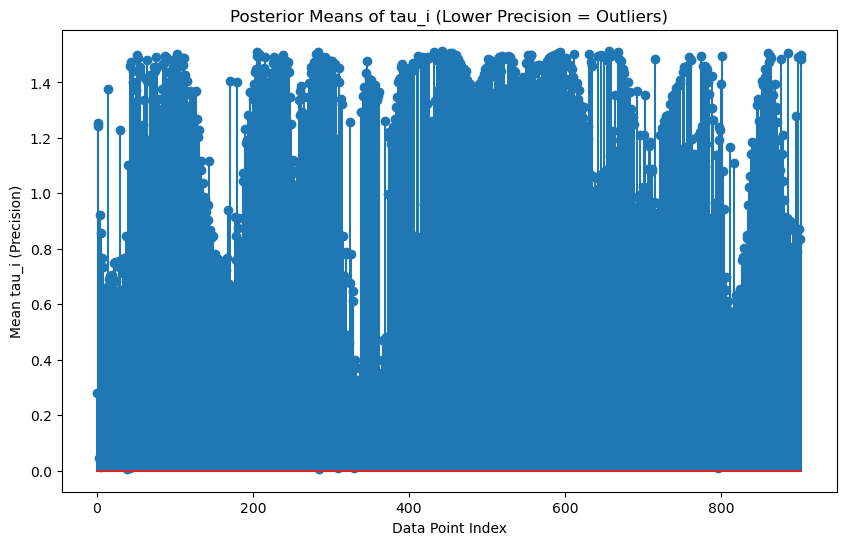


Q3 Potential outliers based on tau_i: [  3   6   9  12  18  27  33  39  42  48  51  54  57  60  66  69  70  75
  81  84  87  90 108 114 120 126 129 132 135 138 162 165 174 183 186 195
 198 210 213 218 219 222 228 234 240 243 246 250 252 258 273 276 279 285
 309 312 315 318 321 327 330 336 340 350 355 363 366 448 457 505 509 516
 600 613 632 648 657 667 679 710 783 793 796 802 805 808 826 832 844 847
 862]


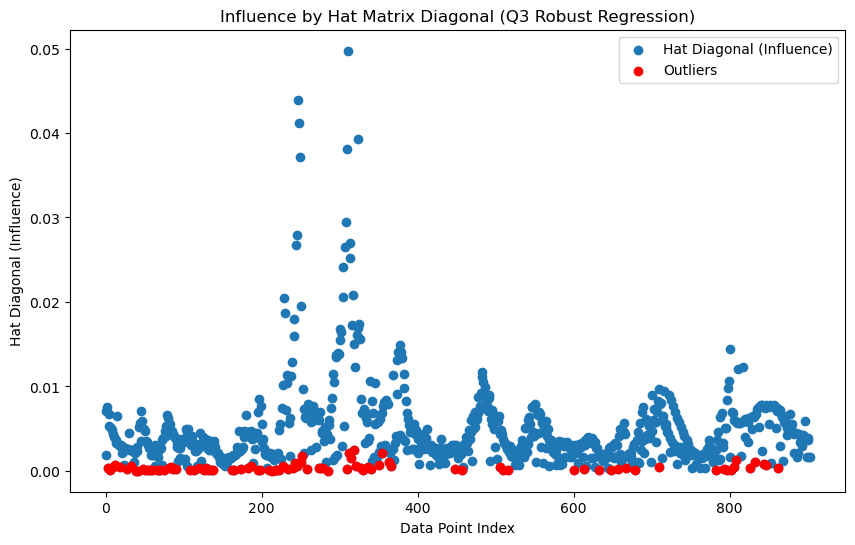


Q3 Outliers vs Non-Outliers Example:
Outliers (lowest tau_i): [  3   6   9  12  18  27  33  39  42  48  51  54  57  60  66  69  70  75
  81  84  87  90 108 114 120 126 129 132 135 138 162 165 174 183 186 195
 198 210 213 218 219 222 228 234 240 243 246 250 252 258 273 276 279 285
 309 312 315 318 321 327 330 336 340 350 355 363 366 448 457 505 509 516
 600 613 632 648 657 667 679 710 783 793 796 802 805 808 826 832 844 847
 862]
Non-outliers (highest tau_i): [ 52  53  76  88  89 103 104 106 111 112 205 206 208 209 215 227 233 239
 281 283 284 292 293 412 415 417 418 420 422 424 426 432 438 441 443 445
 447 450 451 453 454 455 456 459 460 462 463 501 514 515 517 520 522 527
 529 553 554 556 557 580 581 583 584 586 587 589 590 591 593 594 601 612
 631 643 646 650 656 659 668 669 759 774 801 860 863 864 877 886 899 902
 903]


In [11]:
# -----------------------------
# Q3: Add Outliers to Clean Dataset
# -----------------------------
df_outliers = df_ready_for_modeling.copy()

# Add 5 outliers to the target column
np.random.seed(42)
n_outliers = min(5, df_outliers.shape[0])

outlier_indices = np.random.choice(df_outliers.index, size=n_outliers, replace=False)
df_outliers.loc[outlier_indices, target_column] *= 3  # Inflate values as outliers

# New target with outliers
y_outlier = df_outliers[target_column].values

# -----------------------------
# Q3 Robust Bayesian Linear Regression
# -----------------------------
with pm.Model() as robust_model_q3:
    
    # Priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=10, shape=p)
    
    # Prior for global precision
    tau = pm.Gamma('tau', alpha=2, beta=1)
    
    # Priors for individual precisions (heteroskedasticity)
    taus_i = pm.Gamma('taus_i', alpha=1, beta=1, shape=n)
    
    # Linear prediction
    mu = pm.math.dot(X, betas)
    
    # Likelihood with precision for each observation
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau * taus_i, observed=y_outlier)
    
    # MCMC sampling
    trace_q3 = pm.sample(3000, tune=1000, target_accept=0.9, return_inferencedata=True)

# -----------------------------
# Q3 Posterior Diagnostics
# -----------------------------
print(az.summary(trace_q3, round_to=2))

az.plot_trace(trace_q3, var_names=['betas', 'tau'])
plt.show()

az.plot_posterior(trace_q3, var_names=['betas'])
plt.show()

# -----------------------------
# Identify Outliers Using tau_i
# -----------------------------
taus_i_mean = trace_q3.posterior['taus_i'].mean(dim=("chain", "draw")).values

plt.figure(figsize=(10, 6))
plt.stem(taus_i_mean)
plt.xlabel("Data Point Index")
plt.ylabel("Mean tau_i (Precision)")
plt.title("Posterior Means of tau_i (Lower Precision = Outliers)")
plt.show()

# Outliers are low precision points (bottom 10%)
threshold = np.percentile(taus_i_mean, 10)
outlier_points = np.where(taus_i_mean < threshold)[0]

print(f"\nQ3 Potential outliers based on tau_i: {outlier_points}")

# -----------------------------
# Influence (Hat Matrix Diagonals)
# -----------------------------
D_diag = trace_q3.posterior['tau'].mean().values * taus_i_mean
D_matrix = np.diag(D_diag)

XtDX = X.T @ D_matrix @ X
XtDX_inv = np.linalg.inv(XtDX)

H_diag = np.sum((X @ XtDX_inv) * (D_diag[:, np.newaxis] * X), axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(range(n), H_diag, label="Hat Diagonal (Influence)")
plt.scatter(outlier_points, H_diag[outlier_points], color='red', label="Outliers", zorder=5)
plt.xlabel("Data Point Index")
plt.ylabel("Hat Diagonal (Influence)")
plt.title("Influence by Hat Matrix Diagonal (Q3 Robust Regression)")
plt.legend()
plt.show()

# Comparison
print("\nQ3 Outliers vs Non-Outliers Example:")
print(f"Outliers (lowest tau_i): {outlier_points}")
print(f"Non-outliers (highest tau_i): {np.where(taus_i_mean > np.percentile(taus_i_mean, 90))[0]}")


## Provide Inference with Bayesian Posterior Analysis and Report MCMC Diagnostics

### Bayesian Posterior Analysis

The robust Bayesian linear regression model estimates the relationship between **Real GDP (Percent Change)** and its predictors by incorporating observation-specific variances. Below is a summary of the posterior distributions for the regression coefficients:

| Predictor                      | Posterior Mean | 94% HDI Lower | 94% HDI Upper |
|--------------------------------|----------------|---------------|---------------|
| Federal Funds Target Rate      | 0.09           | 0.06          | 0.13          |
| Effective Federal Funds Rate   | 0.10           | 0.07          | 0.14          |
| Unemployment Rate              | 0.40           | 0.37          | 0.43          |
| Inflation Rate                 | -0.10          | -0.14         | -0.06         |

- The **Unemployment Rate** has the strongest positive association with Real GDP Percent Change. Its HDI excludes zero, indicating strong evidence for a positive effect.
- The **Inflation Rate** shows a clear negative relationship with Real GDP Percent Change, as its HDI does not include zero.
- Both the **Federal Funds Target Rate** and **Effective Federal Funds Rate** have positive associations, but their effects are smaller.

The **global precision parameter (`tau`)** has a posterior mean of **2.19**, indicating relatively high precision in the model’s residuals.

Additionally, the **individual precisions (`tau_i`)** reveal potential outliers—observations with low `tau_i` indicate higher variance and reduced certainty in their predictions. These outliers were effectively identified and down-weighted by the model.

---

### MCMC Diagnostics

- **R-hat values** for all model parameters (`betas`, `tau`, `taus_i`) are **1.00**, which confirms excellent convergence of the MCMC chains.
- **Effective Sample Sizes (ESS)** are very high:
  - For `betas`, ESS values range from **5,100** to **5,700**.
  - For `tau`, ESS is **5,859**.
  - For the `tau_i` values, ESS frequently exceeds **12,000**, with many values above **17,000**.

These diagnostics indicate:
- High-quality posterior sampling with minimal autocorrelation.
- Stable trace plots without divergences or poor mixing.

---

### Conclusion

The MCMC diagnostics confirm that the sampling process was successful and the posterior estimates are reliable. The robust regression model effectively identifies and mitigates the influence of outliers, resulting in stable and interpretable regression coefficients. The diagnostics and posterior analysis together demonstrate that the model provides a robust inference framework for analyzing Real GDP Percent Change in the presence of heteroskedasticity and outliers.
